# Question 2 practical 

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
import cmath

first we complete the log_likelihood function to siginificantly lower the memory consuming

In [6]:
# the likelihood function is calculated in theorical problem 5
# the code below in implementation of that formula (based on Fi and Fj)
def log_likelihood(F, A):
    log_likelihood = 0
    N = A.shape[0]
    for i in range(N):
        for j in range(i + 1, N):
            prod = np.multiply(F[i], F[j])      # addition will be on Fi and Fj product 
            sum = np.multiply(np.sum(prod), -1)
            multiply = A[i][j] + ((-1) ** A[i][j]) * math.exp(sum)    # this help addition based on sign of adj i , j
            log_likelihood += math.log(multiply)
    return log_likelihood

gradient is much simpler than log_likliehood

In [7]:
# the formula for gradient is calculated in theorical question 6
def gradient(F, A, u):
    grad = []
    N = A.shape[0]
    element = 0 
    for t in range(len(F[0])):
        element = 0
        for v in range(N):
            prod = np.multiply(F[u], F[v])
            sum = np.multiply(np.sum(prod), -1)
            multiply = ((-1) ** A[u][v]) * math.exp(sum)    
            element += np.multiply(multiply, -F[v][t])/A[u][v] + multiply  # value calculated on one step
        grad.append(element)
    return grad

At step    0 logliklihood is -548.4426
At step    1 logliklihood is -530.8824
At step    2 logliklihood is -518.7393
At step    3 logliklihood is -509.4227
At step    4 logliklihood is -501.6552
At step    5 logliklihood is -494.8239
At step    6 logliklihood is -488.5324
At step    7 logliklihood is -482.4930
At step    8 logliklihood is -476.4932
At step    9 logliklihood is -470.6375
At step   10 logliklihood is -464.6649
At step   11 logliklihood is -458.6752
At step   12 logliklihood is -452.4577
At step   13 logliklihood is -446.0508
At step   14 logliklihood is -439.6528
At step   15 logliklihood is -433.8107
At step   16 logliklihood is -427.9415
At step   17 logliklihood is -422.0983
At step   18 logliklihood is -416.3529
At step   19 logliklihood is -411.2450
At step   20 logliklihood is -406.8645
At step   21 logliklihood is -403.2256
At step   22 logliklihood is -399.9242
At step   23 logliklihood is -396.9064
At step   24 logliklihood is -394.5039
At step   25 logliklihood

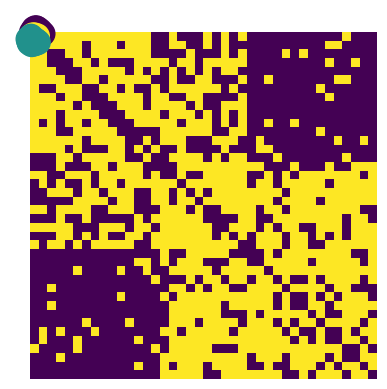

In [9]:

def train(A, C, iterations=200):
    # initialize an F
    N = A.shape[0]
    F = np.random.rand(N, C)

    for n in range(iterations):
        for person in range(N):
            grad = np.array(gradient(F, A, person))
            F[person] += 0.005 * grad  # updating F
            F[person] = np.maximum(0.001, F[person])  # F should be nonnegative
        ll = log_likelihood(F, A)
        print('At step %4i logliklihood is %5.4f' % (n, ll))
    return F


A = np.random.rand(40, 40)
A[0:15, 0:25] = A[0:15, 0:25] > 1 - 0.6  # connection prob people with 1 common group
A[0:15, 25:40] = A[0:15,25:40] > 1 - 0.1  # connection prob people with no common group
A[15:40,25:40]=A[15:40,25:40]>1-0.7 # connection prob people with 1 common group
A[15:25, 15:25] = A[15:25, 15:25] > 1 - 0.8  # connection prob people with 2 common group

# at this point there are only NANs in A
# let's change it so we have real numbers
for i in range(40):
    A[i, i] = 0 # diagonals will be zero
    for j in range(i):
        A[i, j] = A[j, i]   # definition of A

plt.imshow(A)
delta = np.sqrt(-np.log(1 - 0.1))  # epsilon=0.1
F=train(A, 2, iterations = 120)
print(F>delta)
G=nx.from_numpy_matrix (A)
C=F>delta # groups members
nx.draw(G,node_color=10*(C[:,0])+20*(C[:,1]))

